In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import io

# 1. Define the local file path
# NOTE: The path provided by the user needs to be handled carefully in Python
# We use a raw string (r"...") to handle the backslashes correctly.
file_path = r"C:\Users\Yosef\OneDrive\Documents\GitHub\weather-distrib\output_max_temp\part-00000"

# 2. Read and Parse the MapReduce Output
# The data needs custom parsing because it's not a standard CSV/TSV.

def parse_hadoop_output(file_path):
    """Reads the unique Hadoop Streaming output format and returns a DataFrame."""
    
    # Read all lines from the file
    with open(file_path, 'r') as f:
        data_lines = f.readlines()

    parsed_data = []

    for line in data_lines:
        # Clean up whitespace and split by the tab after 'Location:X'
        try:
            location_part, metrics_string = line.strip().split('\t', 1)
            
            # Extract Location ID (e.g., '0' from 'Location:0')
            location_id = location_part.split(':')[1]
            
            # Split the metrics string by comma and process each metric
            metrics = {}
            for item in metrics_string.split(','):
                # Split by colon, strip whitespace, and convert value to float
                key, value = item.split(':')
                metrics[key.strip()] = float(value.strip())
            
            # Combine location ID and metrics
            row = {'Location': location_id}
            row.update(metrics)
            parsed_data.append(row)
            
        except Exception as e:
            print(f"Skipping malformed line: {line.strip()}. Error: {e}")
            continue

    # Convert list of dictionaries to a Pandas DataFrame
    return pd.DataFrame(parsed_data)

# Call the parsing function
df = parse_hadoop_output(file_path)

# Rename the columns for easier plotting
df.columns = ['Location', 'Max Temp', 'Min Temp', 'Avg Temp', 'Avg Humidity', 
              'Avg Dew', 'Avg Pressure', 'Avg Windspeed', 'Avg Wind Direction', 
              'Avg Rain amount']

# Set the Location as the index for plotting
df = df.set_index('Location')

print("--- Parsed Data Summary ---")
print(df.head())
print("--------------------------")

--- Parsed Data Summary ---
          Max Temp  Min Temp  Avg Temp  Avg Humidity  Avg Dew  Avg Pressure  \
Location                                                                      
0             26.7      -2.3      8.81         76.92     4.68       1010.73   
1             27.3      -3.1      9.30         77.82     5.37       1002.99   
2             25.5      -2.5      9.33         78.08     5.44       1012.23   

          Avg Windspeed  Avg Wind Direction  Avg Rain amount  
Location                                                      
0                 14.22              197.82             0.06  
1                  6.42              187.54             0.08  
2                 13.59              194.38             0.10  
--------------------------


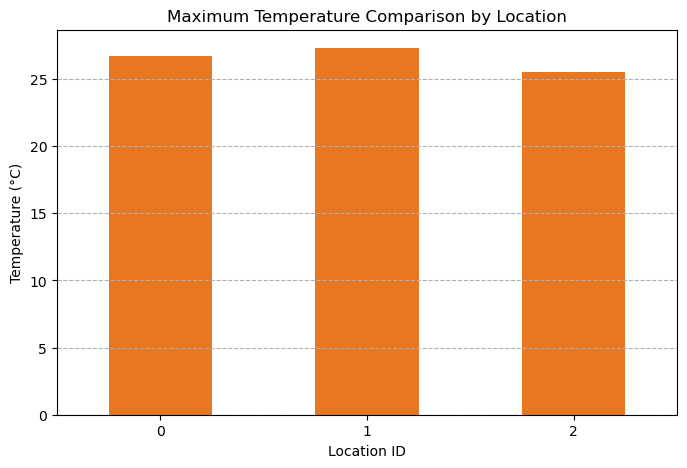

In [2]:
plt.figure(figsize=(8, 5))
df['Max Temp'].plot(kind='bar', color='#E87722')
plt.title('Maximum Temperature Comparison by Location')
plt.ylabel('Temperature (°C)')
plt.xlabel('Location ID')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

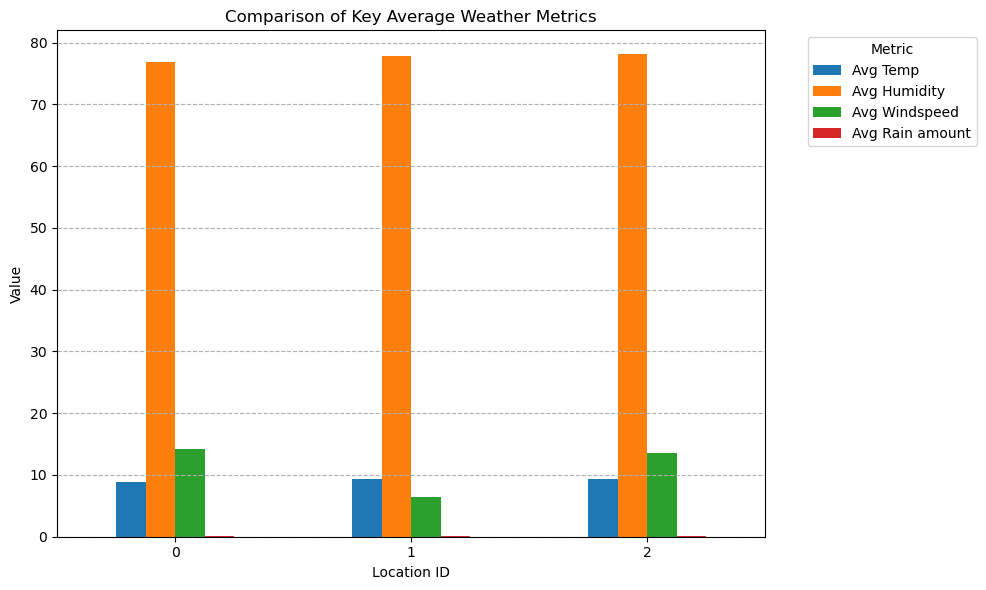

In [3]:
key_metrics = ['Avg Temp', 'Avg Humidity', 'Avg Windspeed', 'Avg Rain amount']

plt.figure(figsize=(10, 6))
df[key_metrics].plot(kind='bar', ax=plt.gca())
plt.title('Comparison of Key Average Weather Metrics')
plt.ylabel('Value')
plt.xlabel('Location ID')
plt.xticks(rotation=0)
plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

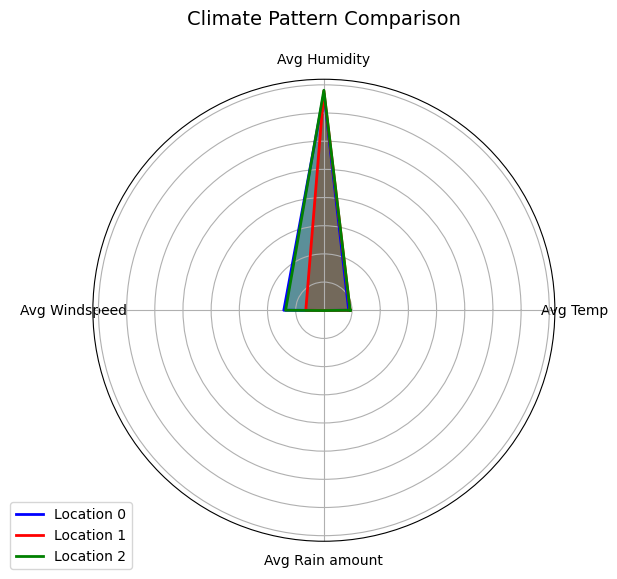

In [4]:
from math import pi

# Prepare data for Radar Chart
categories = key_metrics # Use the same key metrics
N = len(categories)

# Calculate angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Create subplots for the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Function to plot a single location
def plot_radar(row_data, label, color):
    values = row_data[categories].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=label, color=color)
    ax.fill(angles, values, color=color, alpha=0.4)

# Plotting each location
plot_radar(df.loc['0'], 'Location 0', 'blue')
plot_radar(df.loc['1'], 'Location 1', 'red')
plot_radar(df.loc['2'], 'Location 2', 'green')

# Customize the chart
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.set_yticklabels([]) # Hide y-axis labels
ax.set_title('Climate Pattern Comparison', size=14, color='black', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()